c:\Users\chrel\Documents\GitHub\FysikCamp2025\brand\FysikCamp2025\brand\FysikCamp2025\brand


Cloning into 'FysikCamp2025'...
Updating files:  44% (13/29)
Updating files:  48% (14/29)
Updating files:  51% (15/29)
Updating files:  55% (16/29)
Updating files:  58% (17/29)
Updating files:  62% (18/29)
Updating files:  65% (19/29)
Updating files:  68% (20/29)
Updating files:  72% (21/29)
Updating files:  75% (22/29)
Updating files:  79% (23/29)
Updating files:  82% (24/29)
Updating files:  86% (25/29)
Updating files:  89% (26/29)
Updating files:  93% (27/29)
Updating files:  96% (28/29)
Updating files: 100% (29/29)
Updating files: 100% (29/29), done.
'ls' is not recognized as an internal or external command,
operable program or batch file.


dict_keys(['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12'])


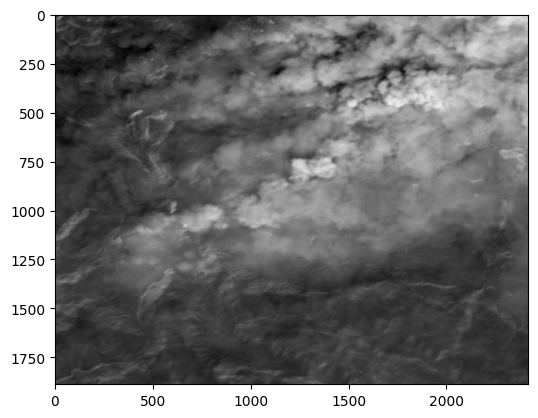

In [2]:
#Brændende pixels
#Hent dataen fra givet fil

from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Hent alle tiff filer i en mappen med billeder
!git clone https://github.com/UNFFysikCamp/FysikCamp2025.git
%cd FysikCamp2025/brand
!ls  # viser indholdet i brand/

# Åben alle rå tiff filer og gem i Bands array
Data = {}

filename_begin = "2021-08-17-00_00_2021-08-17-23_59_Sentinel-2_L2A_"
filename_end = "_(Raw).tiff"
filenames = np.array(["B01", "B02", "B03", "B04", "B05", "B06", "B07",
                   "B08", "B8A","B09", "B11", "B12"])
for i in range(12):
    #Hent alle tiff filer i bands
    filename = filename_begin + filenames[i] + filename_end

    band = Image.open(filename)
    Data[filenames[i]] = np.array(band)
    band.close()

print(Data.keys())


plt.imshow(Data["B01"], cmap='gray')

## Nu skal vi finde de brændende pixels.
### Først skal vi prøve at finde sammenhænge imellem båndene så vi kan se hvordan vi kan sortere pixelene.
#### Ændre band1 og band2


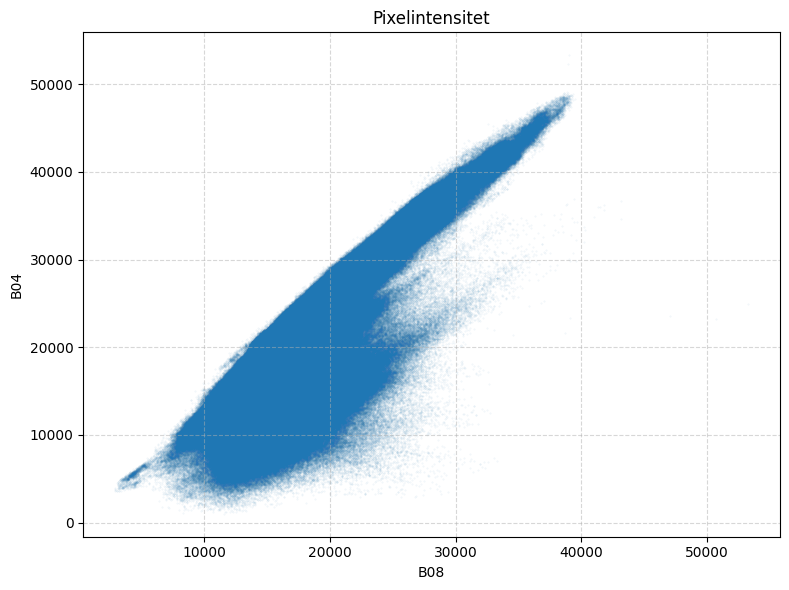

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
# Plot intensitet
#Vælg bånd
band1 = "B08"
band2 = "B04"
ax.scatter(Data[band1].flatten(), Data[band2].flatten(),alpha=0.1,s=0.1)

ax.set_title("Pixelintensitet")
ax.set_xlabel(band1)
ax.set_ylabel(band2)
# tilføj et grid
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Nu laver vi en maske og putter på billedet.
Nu ændrer vi pixel værdier som går fra 0 til 65535.

56216 0


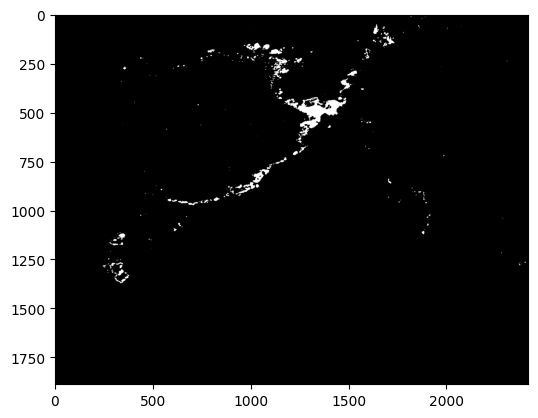

In [ ]:
#Nu Laver vi en maske.

print(max(Data["B01"].flatten()), min(Data["B01"].flatten()))
mask1 = Data["B02"] < 30000
mask2 = Data["B12"] > 30000
#Kombiner maskerne og lav en ny maske kun måske hvor begge er sande, i en ny maske
mask = mask1 & mask2
plt.imshow(mask, cmap='gray')
plt.show()


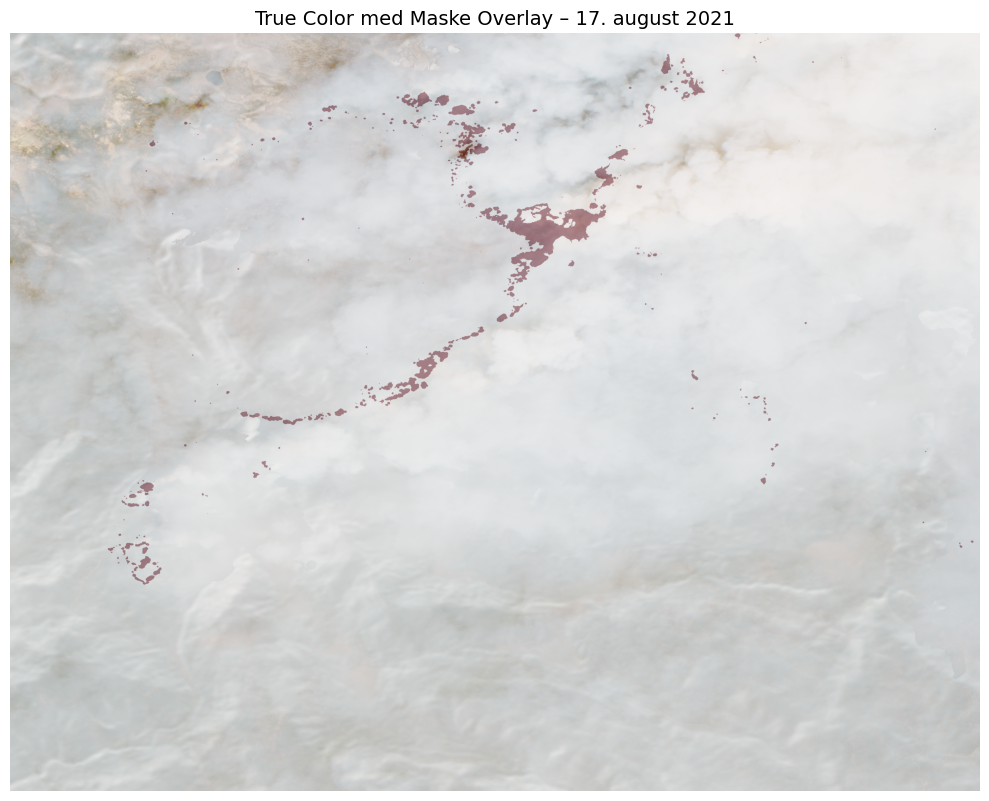

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Indlæs True Color billedet
true_color_img = Image.open(path+"2021-08-17-00_00_2021-08-17-23_59_Sentinel-2_L2A_True_color.tiff")
true_color_array = np.array(true_color_img)

# Opret masken (du har allerede lavet Data["B02"] og Data["B12"])
mask1 = Data["B02"] < 30000
mask2 = Data["B12"] > 30000
mask = mask1 & mask2  # Kun hvor begge betingelser er opfyldt

# Lav plottet
fig, ax = plt.subplots(figsize=(10, 10))

# Vis True Color billedet
ax.imshow(true_color_array)

# Læg masken ovenpå i rød med gennemsigtighed
ax.imshow(mask, cmap='Reds', alpha=0.4)

# Fjern aksetiketter for et rent billede
ax.axis('off')

# Titel
ax.set_title("True Color med Maske Overlay – 17. august 2021", fontsize=14)

plt.tight_layout()
plt.show()
